In [1]:
import pandas as pd
# Load the data with correct date parsing
shoe_sales_data = pd.read_csv('Shoe-Sales.csv', parse_dates=['YearMonth'], index_col='YearMonth')
soft_drink_production_data = pd.read_csv('SoftDrink.csv', parse_dates=['YearMonth'], index_col='YearMonth')

# Display the first few rows of each dataset
shoe_sales_data.head(), soft_drink_production_data.head()


(            Shoe_Sales
 YearMonth             
 1980-01-01          85
 1980-02-01          89
 1980-03-01         109
 1980-04-01          95
 1980-05-01          91,
             SoftDrinkProduction
 YearMonth                      
 1980-01-01                 1954
 1980-02-01                 2302
 1980-03-01                 3054
 1980-04-01                 2414
 1980-05-01                 2226)

In [2]:
shoe_sales_data.isnull().sum()

Shoe_Sales    0
dtype: int64

In [3]:
soft_drink_production_data.isnull().sum()

SoftDrinkProduction    0
dtype: int64

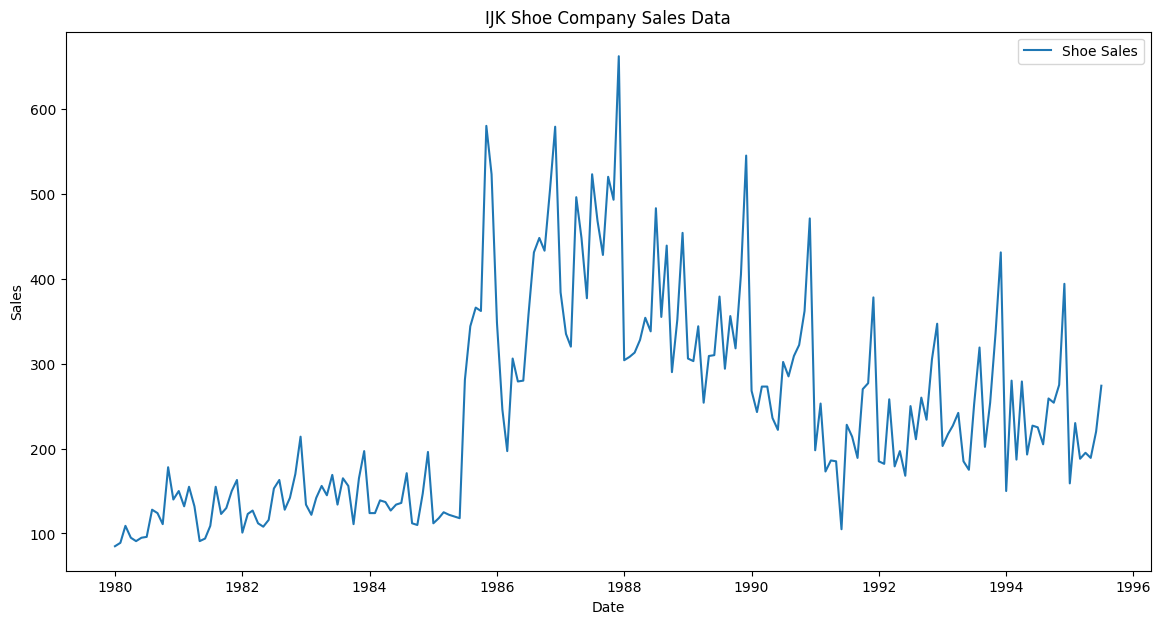

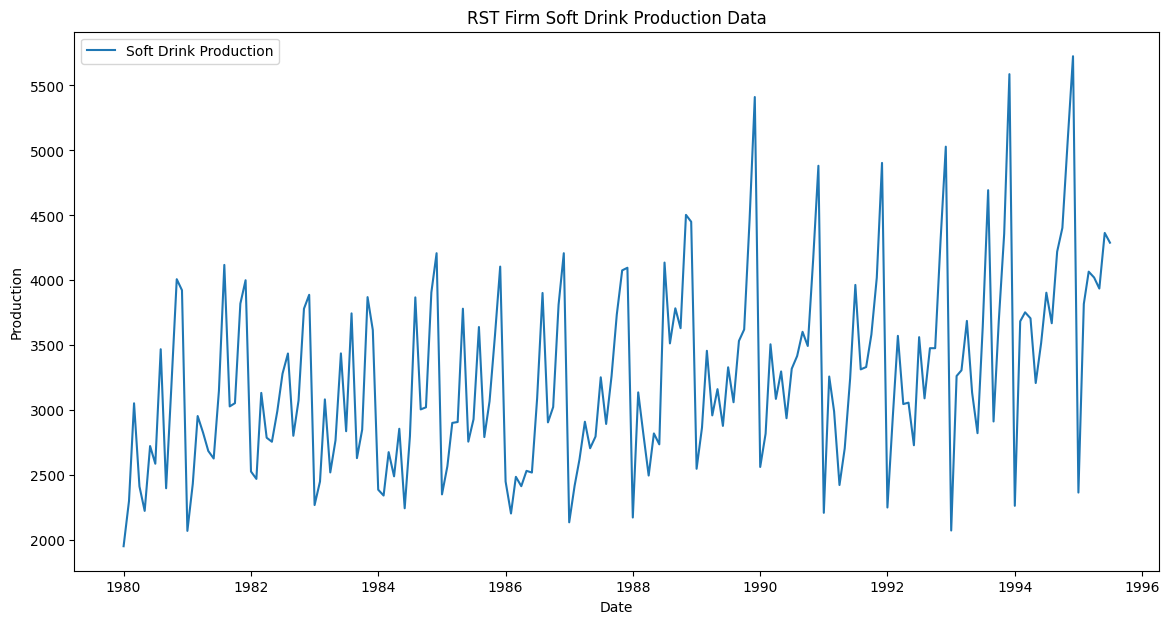

In [4]:
import matplotlib.pyplot as plt

# Plot the shoe sales data
plt.figure(figsize=(14, 7))
plt.plot(shoe_sales_data, label='Shoe Sales')
plt.title('IJK Shoe Company Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot the soft drink production data
plt.figure(figsize=(14, 7))
plt.plot(soft_drink_production_data, label='Soft Drink Production')
plt.title('RST Firm Soft Drink Production Data')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()


In [5]:
# Check for missing values
shoe_sales_missing = shoe_sales_data.isnull().sum()
soft_drink_production_missing = soft_drink_production_data.isnull().sum()

# Descriptive statistics
shoe_sales_describe = shoe_sales_data.describe()
soft_drink_production_describe = soft_drink_production_data.describe()

shoe_sales_missing, soft_drink_production_missing, shoe_sales_describe, soft_drink_production_describe


(Shoe_Sales    0
 dtype: int64,
 SoftDrinkProduction    0
 dtype: int64,
        Shoe_Sales
 count  187.000000
 mean   245.636364
 std    121.390804
 min     85.000000
 25%    143.500000
 50%    220.000000
 75%    315.500000
 max    662.000000,
        SoftDrinkProduction
 count           187.000000
 mean           3262.609626
 std             728.357367
 min            1954.000000
 25%            2748.000000
 50%            3134.000000
 75%            3741.000000
 max            5725.000000)

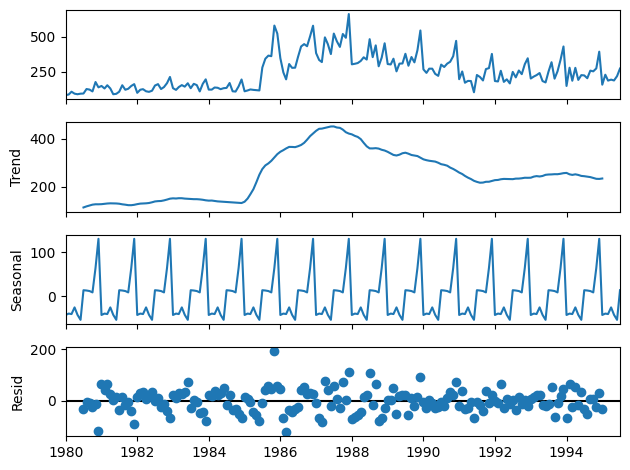

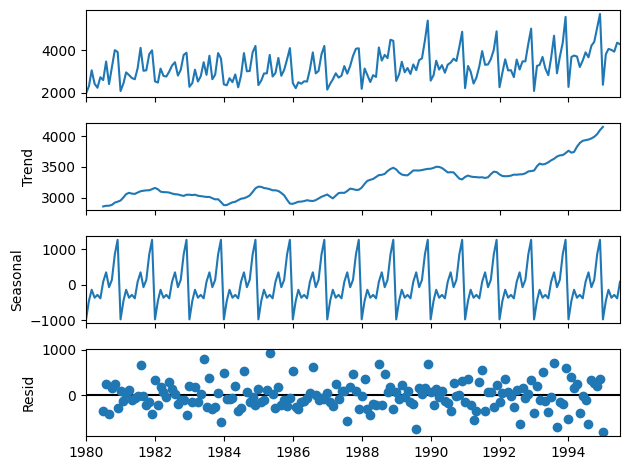

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the shoe sales data
shoe_sales_decomposition = seasonal_decompose(shoe_sales_data, model='additive')
shoe_sales_decomposition.plot()
plt.show()

# Decompose the soft drink production data
soft_drink_production_decomposition = seasonal_decompose(soft_drink_production_data, model='additive')
soft_drink_production_decomposition.plot()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Define the function to split the data
def train_test_split_time_series(data, test_size=0.2):
    split_point = int(len(data) * (1 - test_size))
    train, test = data[:split_point], data[split_point:]
    return train, test

# Split the data
shoe_sales_train, shoe_sales_test = train_test_split_time_series(shoe_sales_data)
soft_drink_train, soft_drink_test = train_test_split_time_series(soft_drink_production_data)

# Verify the split
print("Shoe sales training set length:", len(shoe_sales_train))
print("Shoe sales testing set length:", len(shoe_sales_test))
print("Soft drink production training set length:", len(soft_drink_train))
print("Soft drink production testing set length:", len(soft_drink_test))


Shoe sales training set length: 149
Shoe sales testing set length: 38
Soft drink production training set length: 149
Soft drink production testing set length: 38


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

def linear_regression_model(train, test, target_col):
    train = train.reset_index()
    test = test.reset_index()
    train['time'] = np.arange(len(train))
    test['time'] = np.arange(len(train), len(train) + len(test))

    lr_model = LinearRegression()
    lr_model.fit(train[['time']], train[target_col])

    predictions = lr_model.predict(test[['time']])
    mse = mean_squared_error(test[target_col], predictions)
    mae = mean_absolute_error(test[target_col], predictions)
    return lr_model, mse, mae

# For Shoe Sales
shoe_sales_lr_model, shoe_sales_lr_mse, shoe_sales_lr_mae = linear_regression_model(shoe_sales_train, shoe_sales_test, 'Shoe_Sales')
print(f'Mean Squared Error for Linear Regression (Shoe Sales): {shoe_sales_lr_mse}')

# For Soft Drink Production
soft_drink_lr_model, soft_drink_lr_mse, soft_drink_lr_mae = linear_regression_model(soft_drink_train, soft_drink_test, 'SoftDrinkProduction')
print(f'Mean Squared Error for Linear Regression (Soft Drink Production): {soft_drink_lr_mse}')


Mean Squared Error for Linear Regression (Shoe Sales): 29324.28073336573
Mean Squared Error for Linear Regression (Soft Drink Production): 699768.9626079414


In [9]:
def simple_average_model(train, test):
    mean_value = train.mean()
    predictions = [mean_value] * len(test)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    return mean_value, mse, mae

shoe_sales_sa_mean, shoe_sales_sa_mse, shoe_sales_sa_mae = simple_average_model(shoe_sales_train, shoe_sales_test)
soft_drink_sa_mean, soft_drink_sa_mse, soft_drink_sa_mae = simple_average_model(soft_drink_train, soft_drink_test)

print(f'Mean Squared Error for Simple Average (Shoe Sales): {shoe_sales_sa_mse}')
print(f'Mean Squared Error for Simple Average (Soft Drink Production): {soft_drink_sa_mse}')


Mean Squared Error for Simple Average (Shoe Sales): 3809.0410922694327
Mean Squared Error for Simple Average (Soft Drink Production): 1051067.673177358


In [10]:
def moving_average_model(train, test, window_size=3):
    moving_avg = train.rolling(window=window_size).mean().iloc[-1]
    predictions = [moving_avg] * len(test)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    return moving_avg, mse, mae

shoe_sales_ma_mean, shoe_sales_ma_mse, shoe_sales_ma_mae = moving_average_model(shoe_sales_train, shoe_sales_test)
soft_drink_ma_mean, soft_drink_ma_mse, soft_drink_ma_mae = moving_average_model(soft_drink_train, soft_drink_test)

print(f'Mean Squared Error for Moving Average (Shoe Sales): {shoe_sales_ma_mse}')
print(f'Mean Squared Error for Moving Average (Soft Drink Production): {soft_drink_ma_mse}')


Mean Squared Error for Moving Average (Shoe Sales): 4738.225146198831
Mean Squared Error for Moving Average (Soft Drink Production): 945913.4970760236


In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def exponential_smoothing_model(train, test, trend=None, seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(train.iloc[:, 0], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods).fit()
    predictions = model.forecast(len(test))
    mse = mean_squared_error(test.iloc[:, 0], predictions)
    mae = mean_absolute_error(test.iloc[:, 0], predictions)
    return model, mse, mae

# Single Exponential Smoothing
shoe_sales_single_exp_model, shoe_sales_single_exp_mse, shoe_sales_single_exp_mae = exponential_smoothing_model(
    shoe_sales_train, shoe_sales_test, trend=None, seasonal=None, seasonal_periods=None
)

# Double Exponential Smoothing
shoe_sales_double_exp_model, shoe_sales_double_exp_mse, shoe_sales_double_exp_mae = exponential_smoothing_model(
    shoe_sales_train, shoe_sales_test, trend='add', seasonal=None, seasonal_periods=None
)

# Triple Exponential Smoothing
shoe_sales_triple_exp_model, shoe_sales_triple_exp_mse, shoe_sales_triple_exp_mae = exponential_smoothing_model(
    shoe_sales_train, shoe_sales_test, trend='add', seasonal='add', seasonal_periods=12
)

print(f'Mean Squared Error for Single Exponential Smoothing (Shoe Sales): {shoe_sales_single_exp_mse}')
print(f'Mean Squared Error for Double Exponential Smoothing (Shoe Sales): {shoe_sales_double_exp_mse}')
print(f'Mean Squared Error for Triple Exponential Smoothing (Shoe Sales): {shoe_sales_triple_exp_mse}')


Mean Squared Error for Single Exponential Smoothing (Shoe Sales): 5518.0431338778335
Mean Squared Error for Double Exponential Smoothing (Shoe Sales): 4807.498605606696
Mean Squared Error for Triple Exponential Smoothing (Shoe Sales): 2203.8379347829373


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
# For Soft Drink Production
soft_drink_single_exp_model, soft_drink_single_exp_mse, soft_drink_single_exp_mae = exponential_smoothing_model(
    soft_drink_train, soft_drink_test, trend=None, seasonal=None, seasonal_periods=None
)
soft_drink_double_exp_model, soft_drink_double_exp_mse, soft_drink_double_exp_mae = exponential_smoothing_model(
    soft_drink_train, soft_drink_test, trend='add', seasonal=None, seasonal_periods=None
)
soft_drink_triple_exp_model, soft_drink_triple_exp_mse, soft_drink_triple_exp_mae = exponential_smoothing_model(
    soft_drink_train, soft_drink_test, trend='add', seasonal='add', seasonal_periods=12
)
print(f'Mean Squared Error for Single Exponential Smoothing (Soft Drink Production): {soft_drink_single_exp_mse}')
print(f'Mean Squared Error for Double Exponential Smoothing (Soft Drink Production): {soft_drink_double_exp_mse}')
print(f'Mean Squared Error for Triple Exponential Smoothing (Soft Drink Production): {soft_drink_triple_exp_mse}')

Mean Squared Error for Single Exponential Smoothing (Soft Drink Production): 843611.0340585107
Mean Squared Error for Double Exponential Smoothing (Soft Drink Production): 1116604.2516877097
Mean Squared Error for Triple Exponential Smoothing (Soft Drink Production): 282571.79270644934


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("=> The series is stationary.")
    else:
        print("=> The series is non-stationary.")

# Check stationarity for Shoe Sales
adf_test(shoe_sales_data['Shoe_Sales'], title='Shoe Sales')

# Check stationarity for Soft Drink Production
adf_test(soft_drink_production_data['SoftDrinkProduction'], title='Soft Drink Production')


Augmented Dickey-Fuller Test: Shoe Sales
ADF Test Statistic              -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
=> The series is non-stationary.
Augmented Dickey-Fuller Test: Soft Drink Production
ADF Test Statistic               1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
=> The series is non-stationary.


Augmented Dickey-Fuller Test: Differenced Shoe Sales
ADF Test Statistic              -3.479160
p-value                          0.008539
#Lags Used                      12.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
=> The series is stationary.
Augmented Dickey-Fuller Test: Differenced Soft Drink Production
ADF Test Statistic            -9.313527e+00
p-value                        1.033701e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
=> The series is stationary.


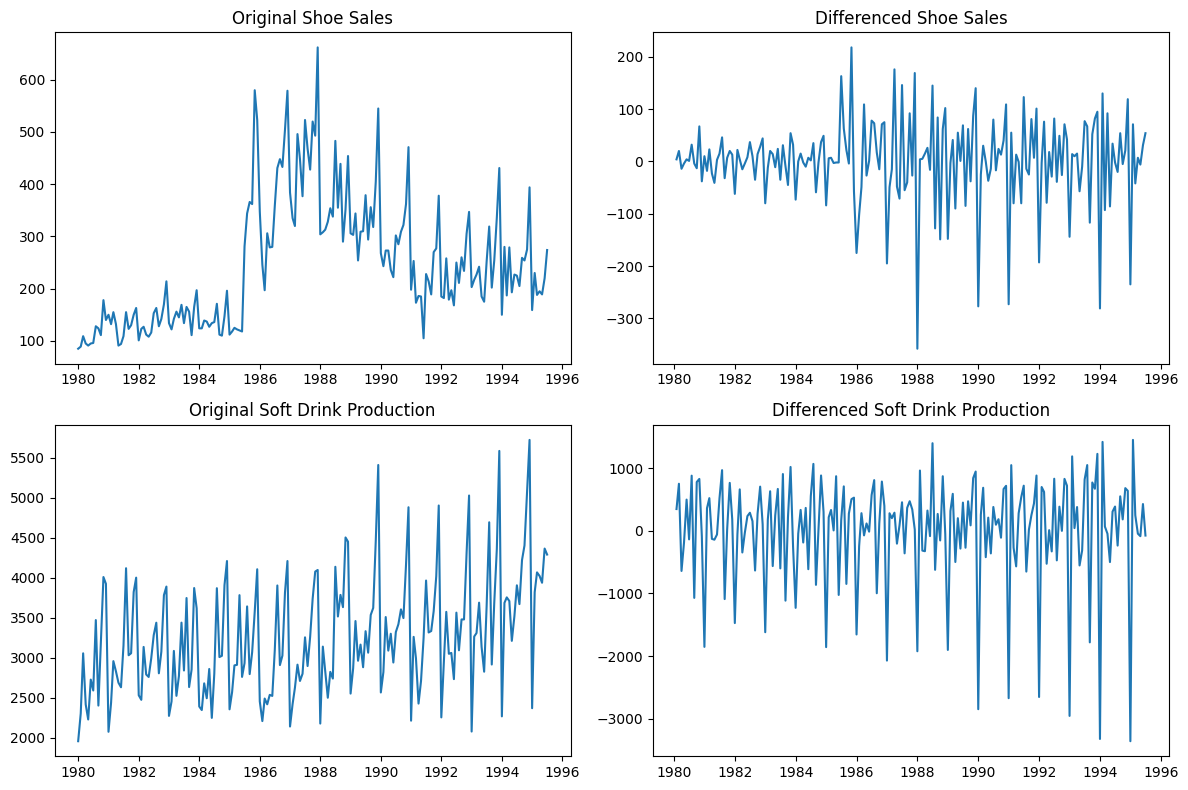

In [14]:
# Function to difference the series
def difference_series(series):
    return series.diff().dropna()

# Difference the Shoe Sales data
shoe_sales_diff = difference_series(shoe_sales_data['Shoe_Sales'])
adf_test(shoe_sales_diff, title='Differenced Shoe Sales')

# Difference the Soft Drink Production data
soft_drink_diff = difference_series(soft_drink_production_data['SoftDrinkProduction'])
adf_test(soft_drink_diff, title='Differenced Soft Drink Production')

# Plot the original and differenced series
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(shoe_sales_data['Shoe_Sales'])
axes[0, 0].set_title('Original Shoe Sales')
axes[0, 1].plot(shoe_sales_diff)
axes[0, 1].set_title('Differenced Shoe Sales')
axes[1, 0].plot(soft_drink_production_data['SoftDrinkProduction'])
axes[1, 0].set_title('Original Soft Drink Production')
axes[1, 1].plot(soft_drink_diff)
axes[1, 1].set_title('Differenced Soft Drink Production')
plt.tight_layout()
plt.show()


In [15]:
# Function to build a linear regression model using differenced data
def linear_regression_model_diff(train, test, target_col):
    train = train.reset_index()
    test = test.reset_index()
    train['time'] = np.arange(len(train))
    test['time'] = np.arange(len(train), len(train) + len(test))

    lr_model = LinearRegression()
    lr_model.fit(train[['time']], train[target_col])

    predictions = lr_model.predict(test[['time']])
    mse = mean_squared_error(test[target_col], predictions)
    mae = mean_absolute_error(test[target_col], predictions)
    return lr_model, mse, mae

# For Differenced Shoe Sales
shoe_sales_lr_model_diff, shoe_sales_lr_mse_diff, shoe_sales_lr_mae_diff = linear_regression_model_diff(shoe_sales_diff.reset_index(), shoe_sales_test.diff().dropna().reset_index(), 'Shoe_Sales')
print(f'Mean Squared Error for Linear Regression (Differenced Shoe Sales): {shoe_sales_lr_mse_diff}')

# For Differenced Soft Drink Production
soft_drink_lr_model_diff, soft_drink_lr_mse_diff, soft_drink_lr_mae_diff = linear_regression_model_diff(soft_drink_diff.reset_index(), soft_drink_test.diff().dropna().reset_index(), 'SoftDrinkProduction')
print(f'Mean Squared Error for Linear Regression (Differenced Soft Drink Production): {soft_drink_lr_mse_diff}')

Mean Squared Error for Linear Regression (Differenced Shoe Sales): 7868.716214140065
Mean Squared Error for Linear Regression (Differenced Soft Drink Production): 1321667.8618776456


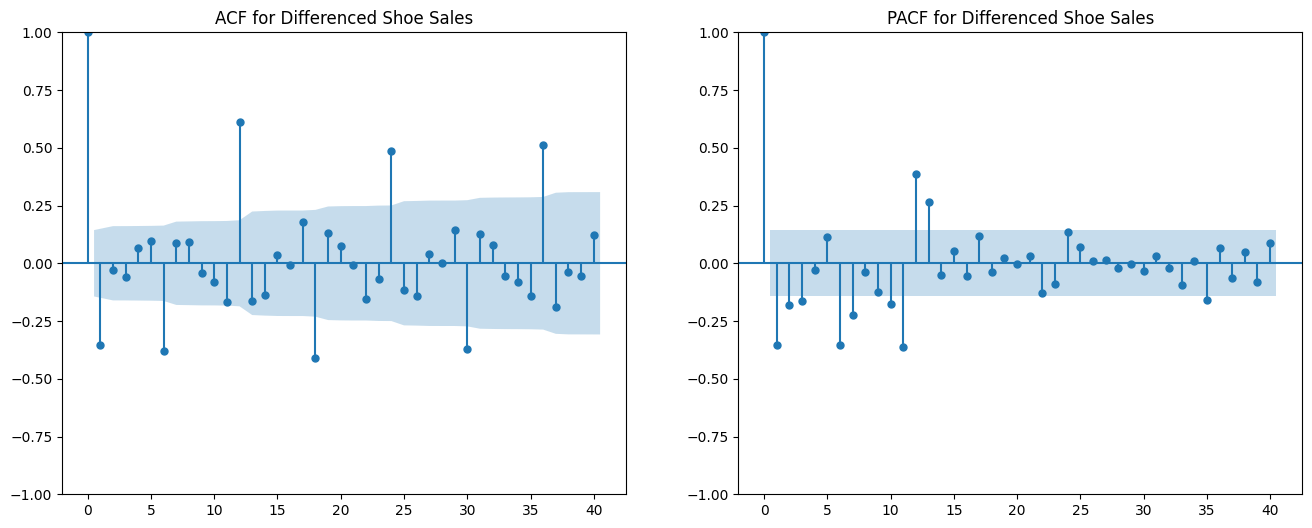

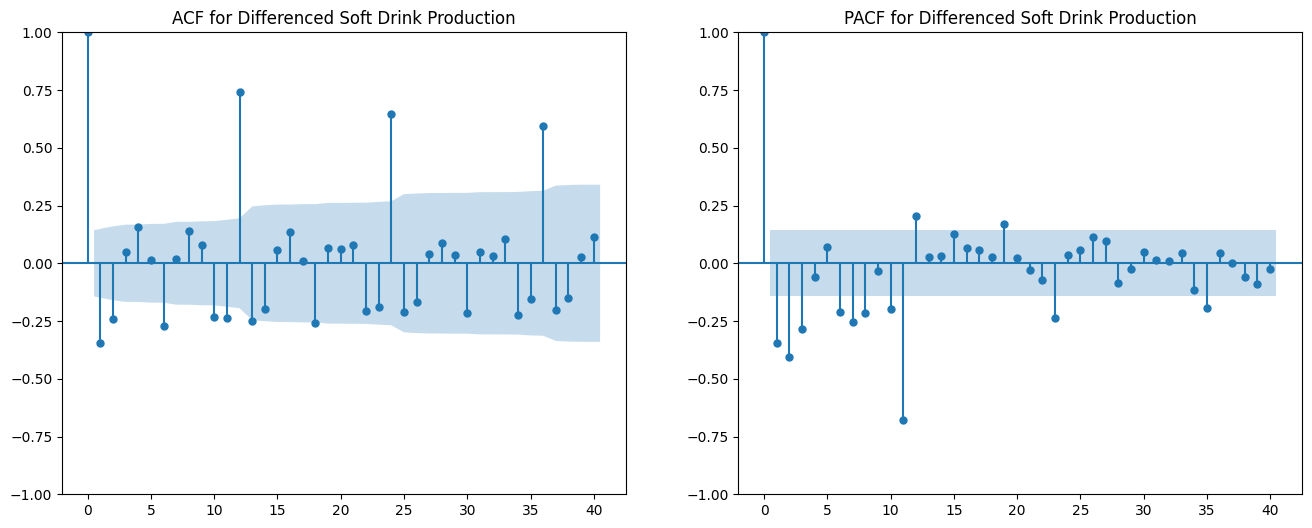

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot ACF and PACF for Differenced Shoe Sales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sm.graphics.tsa.plot_acf(shoe_sales_diff, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(shoe_sales_diff, lags=40, ax=axes[1])
axes[0].set_title('ACF for Differenced Shoe Sales')
axes[1].set_title('PACF for Differenced Shoe Sales')
plt.show()

# Plot ACF and PACF for Differenced Soft Drink Production
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sm.graphics.tsa.plot_acf(soft_drink_diff, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(soft_drink_diff, lags=40, ax=axes[1])
axes[0].set_title('ACF for Differenced Soft Drink Production')
axes[1].set_title('PACF for Differenced Soft Drink Production')
plt.show()


In [17]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.3 MB/s eta 0:00:00


In [18]:
import pmdarima as pm

# Auto ARIMA for Shoe Sales
auto_arima_shoe_sales = pm.auto_arima(shoe_sales_diff, seasonal=False, trace=True)
print(auto_arima_shoe_sales.summary())

# Auto ARIMA for Soft Drink Production
auto_arima_soft_drink = pm.auto_arima(soft_drink_diff, seasonal=False, trace=True)
print(auto_arima_soft_drink.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2128.408, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2164.586, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2141.667, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2130.896, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2126.548, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2128.488, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2125.556, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2126.429, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2137.572, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2127.278, Time=0.19 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 1.596 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  186
Model:               SARIMAX(1, 0, 1)   Log Likelihood        

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Manual ARIMA for Shoe Sales (example: ARIMA(1,1,1))
arima_shoe_sales = ARIMA(shoe_sales_diff, order=(1, 1, 1)).fit()
print(arima_shoe_sales.summary())

# Manual ARIMA for Soft Drink Production (example: ARIMA(1,1,1))
arima_soft_drink = ARIMA(soft_drink_diff, order=(1, 1, 1)).fit()
print(arima_soft_drink.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  186
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1066.470
Date:                Fri, 26 Jul 2024   AIC                           2138.941
Time:                        06:12:49   BIC                           2148.602
Sample:                    02-01-1980   HQIC                          2142.856
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3502      0.055     -6.354      0.000      -0.458      -0.242
ma.L1         -0.9989      0.417     -2.397      0.017      -1.816      -0.182
sigma2      5769.1421   2437.014      2.367      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                SARIMAX Results                                
Dep. Variable:     SoftDrinkProduction   No. Observations:                  186
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -1505.106
Date:                 Fri, 26 Jul 2024   AIC                           3016.212
Time:                         06:12:49   BIC                           3025.873
Sample:                     02-01-1980   HQIC                          3020.127
                          - 07-01-1995                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3429      0.102     -3.363      0.001      -0.543      -0.143
ma.L1         -1.0000      0.084    -11.951      0.000      -1.164      -0.836
sigma2      6.641e+05   1.26e-07   5.27e+12 

In [20]:
# Auto SARIMA for Shoe Sales
auto_sarima_shoe_sales = pm.auto_arima(shoe_sales_diff, seasonal=True, m=12, trace=True)
print(auto_sarima_shoe_sales.summary())

# Auto SARIMA for Soft Drink Production
auto_sarima_soft_drink = pm.auto_arima(soft_drink_diff, seasonal=True, m=12, trace=True)
print(auto_sarima_soft_drink.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2020.226, Time=4.29 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2166.557, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2036.790, Time=0.87 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2073.780, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2164.586, Time=0.07 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2071.620, Time=3.22 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=2021.372, Time=7.12 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=2021.239, Time=3.26 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2130.113, Time=0.44 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.70 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=inf, Time=4.57 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=i

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(5,0,0)(1,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

 ARIMA(5,0,0)(1,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(4,0,1)(1,0,2)[12]             : AIC=inf, Time=3.30 sec
 ARIMA(3,0,1)(1,0,2)[12]             : AIC=2734.633, Time=2.63 sec
 ARIMA(3,0,1)(0,0,2)[12]             : AIC=2834.683, Time=4.36 sec
 ARIMA(3,0,1)(1,0,1)[12]             : AIC=2733.576, Time=1.35 sec
 ARIMA(3,0,1)(0,0,1)[12]             : AIC=2868.721, Time=0.73 sec
 ARIMA(3,0,1)(1,0,0)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(3,0,1)(2,0,1)[12]             : AIC=inf, Time=3.36 sec
 ARIMA(3,0,1)(0,0,0)[12]             : AIC=2958.420, Time=0.29 sec
 ARIMA(3,0,1)(2,0,0)[12]             : AIC=inf, Time=4.12 sec


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,0,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

 ARIMA(3,0,1)(2,0,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(1,0,1)[12]             : AIC=2742.132, Time=1.63 sec
 ARIMA(3,0,0)(1,0,1)[12]             : AIC=2746.930, Time=1.26 sec
 ARIMA(4,0,1)(1,0,1)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(3,0,2)(1,0,1)[12]             : AIC=inf, Time=2.20 sec
 ARIMA(2,0,0)(1,0,1)[12]             : AIC=2766.968, Time=0.89 sec
 ARIMA(2,0,2)(1,0,1)[12]             : AIC=inf, Time=2.58 sec
 ARIMA(4,0,2)(1,0,1)[12]             : AIC=inf, Time=3.81 sec
 ARIMA(3,0,1)(1,0,1)[12] intercept   : AIC=2801.119, Time=1.61 sec

Best model:  ARIMA(3,0,1)(1,0,1)[12]          
Total fit time: 149.251 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  186
Model:             SARIMAX(3, 0, 1)x(1, 0, 1, 12)   Log Likelihood               -1359.788
Date:                            Fri, 26 Jul 2024   AIC               

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manual SARIMA for Shoe Sales (example: SARIMA(1, 1, 1)(1, 1, 1, 12))
sarima_shoe_sales = SARIMAX(shoe_sales_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
print(sarima_shoe_sales.summary())

# Manual SARIMA for Soft Drink Production (example: SARIMA(1, 1, 1)(1, 1, 1, 12))
sarima_soft_drink = SARIMAX(soft_drink_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
print(sarima_soft_drink.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Shoe_Sales   No. Observations:                  186
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -937.683
Date:                            Fri, 26 Jul 2024   AIC                           1885.367
Time:                                    06:18:01   BIC                           1901.133
Sample:                                02-01-1980   HQIC                          1891.763
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4703      0.051     -9.268      0.000      -0.570      -0.371
ma.L1         -0.9992      1.101   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                SoftDrinkProduction   No. Observations:                  186
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1288.552
Date:                            Fri, 26 Jul 2024   AIC                           2587.103
Time:                                    06:18:02   BIC                           2602.870
Sample:                                02-01-1980   HQIC                          2593.500
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4696      0.052     -9.076      0.000      -0.571      -0.368
ma.L1         -1.0000      0.097   

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(model, test, n_diff):
    # Adjust length of test data for differencing
    test = test[n_diff:].values.squeeze()

    # Check if the model is a statsmodels ARIMA/SARIMA model
    if isinstance(model, (ARIMA, SARIMAX)):
        predictions = model.forecast(steps=len(test))
    # Check if the model is a pmdarima ARIMA model
    elif hasattr(model, 'predict'):
        predictions = model.predict(n_periods=len(test))
    else:
        raise ValueError("Model type not supported for evaluation.")

    # Ensure predictions and test data are of the same length
    if len(predictions) > len(test):
        predictions = predictions[:len(test)]
    elif len(predictions) < len(test):
        test = test[:len(predictions)]

    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    return mse, mae


In [23]:
# Evaluate Auto ARIMA for Shoe Sales
shoe_sales_auto_arima_mse, shoe_sales_auto_arima_mae = evaluate_model(auto_arima_shoe_sales, shoe_sales_test.diff().dropna(), n_diff=1)
print(f'Auto ARIMA MSE (Shoe Sales): {shoe_sales_auto_arima_mse}')
print(f'Auto ARIMA MAE (Shoe Sales): {shoe_sales_auto_arima_mae}')

# Evaluate Manual ARIMA for Shoe Sales
shoe_sales_manual_arima_mse, shoe_sales_manual_arima_mae = evaluate_model(arima_shoe_sales, shoe_sales_test.diff().dropna(), n_diff=1)
print(f'Manual ARIMA MSE (Shoe Sales): {shoe_sales_manual_arima_mse}')
print(f'Manual ARIMA MAE (Shoe Sales): {shoe_sales_manual_arima_mae}')

# Evaluate Auto SARIMA for Shoe Sales
shoe_sales_auto_sarima_mse, shoe_sales_auto_sarima_mae = evaluate_model(auto_sarima_shoe_sales, shoe_sales_test.diff().dropna(), n_diff=1)
print(f'Auto SARIMA MSE (Shoe Sales): {shoe_sales_auto_sarima_mse}')
print(f'Auto SARIMA MAE (Shoe Sales): {shoe_sales_auto_sarima_mae}')

# Evaluate Manual SARIMA for Shoe Sales
shoe_sales_manual_sarima_mse, shoe_sales_manual_sarima_mae = evaluate_model(sarima_shoe_sales, shoe_sales_test.diff().dropna(), n_diff=1)
print(f'Manual SARIMA MSE (Shoe Sales): {shoe_sales_manual_sarima_mse}')
print(f'Manual SARIMA MAE (Shoe Sales): {shoe_sales_manual_sarima_mae}')

# Evaluate Auto ARIMA for Soft Drink Production
soft_drink_auto_arima_mse, soft_drink_auto_arima_mae = evaluate_model(auto_arima_soft_drink, soft_drink_test.diff().dropna(), n_diff=1)
print(f'Auto ARIMA MSE (Soft Drink Production): {soft_drink_auto_arima_mse}')
print(f'Auto ARIMA MAE (Soft Drink Production): {soft_drink_auto_arima_mae}')

# Evaluate Manual ARIMA for Soft Drink Production
soft_drink_manual_arima_mse, soft_drink_manual_arima_mae = evaluate_model(arima_soft_drink, soft_drink_test.diff().dropna(), n_diff=1)
print(f'Manual ARIMA MSE (Soft Drink Production): {soft_drink_manual_arima_mse}')
print(f'Manual ARIMA MAE (Soft Drink Production): {soft_drink_manual_arima_mae}')

# Evaluate Auto SARIMA for Soft Drink Production
soft_drink_auto_sarima_mse, soft_drink_auto_sarima_mae = evaluate_model(auto_sarima_soft_drink, soft_drink_test.diff().dropna(), n_diff=1)
print(f'Auto SARIMA MSE (Soft Drink Production): {soft_drink_auto_sarima_mse}')
print(f'Auto SARIMA MAE (Soft Drink Production): {soft_drink_auto_sarima_mae}')

# Evaluate Manual SARIMA for Soft Drink Production
soft_drink_manual_sarima_mse, soft_drink_manual_sarima_mae = evaluate_model(sarima_soft_drink, soft_drink_test.diff().dropna(), n_diff=1)
print(f'Manual SARIMA MSE (Soft Drink Production): {soft_drink_manual_sarima_mse}')
print(f'Manual SARIMA MAE (Soft Drink Production): {soft_drink_manual_sarima_mae}')


Auto ARIMA MSE (Shoe Sales): 7878.246561908018
Auto ARIMA MAE (Shoe Sales): 64.7812159022766
Manual ARIMA MSE (Shoe Sales): 7752.277289898592
Manual ARIMA MAE (Shoe Sales): 64.4821713276115
Auto SARIMA MSE (Shoe Sales): 2035.7434509000802
Auto SARIMA MAE (Shoe Sales): 33.07547505620904
Manual SARIMA MSE (Shoe Sales): 8910.586056004186
Manual SARIMA MAE (Shoe Sales): 75.12293109645015
Auto ARIMA MSE (Soft Drink Production): 1336586.0037813315
Auto ARIMA MAE (Soft Drink Production): 779.3194054047856
Manual ARIMA MSE (Soft Drink Production): 1294846.7625934277
Manual ARIMA MAE (Soft Drink Production): 773.6451549565966
Auto SARIMA MSE (Soft Drink Production): 205443.38448665684
Auto SARIMA MAE (Soft Drink Production): 322.17460857838745
Manual SARIMA MSE (Soft Drink Production): 1949455.7012737866
Manual SARIMA MAE (Soft Drink Production): 1113.8720799747234


In [24]:
performance_metrics = {
    'Model': [
        'Auto ARIMA (Shoe Sales)', 'Manual ARIMA (Shoe Sales)',
        'Auto SARIMA (Shoe Sales)', 'Manual SARIMA (Shoe Sales)',
        'Auto ARIMA (Soft Drink Production)', 'Manual ARIMA (Soft Drink Production)',
        'Auto SARIMA (Soft Drink Production)', 'Manual SARIMA (Soft Drink Production)'
    ],
    'MSE': [
        shoe_sales_auto_arima_mse, shoe_sales_manual_arima_mse,
        shoe_sales_auto_sarima_mse, shoe_sales_manual_sarima_mse,
        soft_drink_auto_arima_mse, soft_drink_manual_arima_mse,
        soft_drink_auto_sarima_mse, soft_drink_manual_sarima_mse
    ],
    'MAE': [
        shoe_sales_auto_arima_mae, shoe_sales_manual_arima_mae,
        shoe_sales_auto_sarima_mae, shoe_sales_manual_sarima_mae,
        soft_drink_auto_arima_mae, soft_drink_manual_arima_mae,
        soft_drink_auto_sarima_mae, soft_drink_manual_sarima_mae
    ]
}

performance_df = pd.DataFrame(performance_metrics)
print(performance_df)


                                   Model           MSE          MAE
0                Auto ARIMA (Shoe Sales)  7.878247e+03    64.781216
1              Manual ARIMA (Shoe Sales)  7.752277e+03    64.482171
2               Auto SARIMA (Shoe Sales)  2.035743e+03    33.075475
3             Manual SARIMA (Shoe Sales)  8.910586e+03    75.122931
4     Auto ARIMA (Soft Drink Production)  1.336586e+06   779.319405
5   Manual ARIMA (Soft Drink Production)  1.294847e+06   773.645155
6    Auto SARIMA (Soft Drink Production)  2.054434e+05   322.174609
7  Manual SARIMA (Soft Drink Production)  1.949456e+06  1113.872080


In [25]:
best_model_shoe_sales = performance_df[performance_df['Model'].str.contains('Shoe Sales')].sort_values(by=['MSE', 'MAE']).iloc[0]
best_model_soft_drink = performance_df[performance_df['Model'].str.contains('Soft Drink Production')].sort_values(by=['MSE', 'MAE']).iloc[0]

print("Best Model for Shoe Sales:")
print(best_model_shoe_sales)
print("\nBest Model for Soft Drink Production:")
print(best_model_soft_drink)


Best Model for Shoe Sales:
Model    Auto SARIMA (Shoe Sales)
MSE                   2035.743451
MAE                     33.075475
Name: 2, dtype: object

Best Model for Soft Drink Production:
Model    Auto SARIMA (Soft Drink Production)
MSE                            205443.384487
MAE                               322.174609
Name: 6, dtype: object


In [26]:
print(shoe_sales_data.tail())
print(soft_drink_production_data.tail())


            Shoe_Sales
YearMonth             
1995-03-01         188
1995-04-01         195
1995-05-01         189
1995-06-01         220
1995-07-01         274
            SoftDrinkProduction
YearMonth                      
1995-03-01                 4067
1995-04-01                 4022
1995-05-01                 3937
1995-06-01                 4365
1995-07-01                 4290


In [27]:
# Ensure the index covers the entire date range with monthly frequency
shoe_sales_data = shoe_sales_data.asfreq('MS')
soft_drink_production_data = soft_drink_production_data.asfreq('MS')

# Interpolate missing values
shoe_sales_data = shoe_sales_data.interpolate(method='linear')
soft_drink_production_data = soft_drink_production_data.interpolate(method='linear')

# Ensure no NaN values remain
shoe_sales_data = shoe_sales_data.fillna(method='bfill').fillna(method='ffill')
soft_drink_production_data = soft_drink_production_data.fillna(method='bfill').fillna(method='ffill')

# Verify no NaNs remain
print(shoe_sales_data.isna().sum())
print(soft_drink_production_data.isna().sum())

# Fit Auto SARIMA on the entire dataset for Shoe Sales
best_model_shoe_sales_full = pm.auto_arima(shoe_sales_data, seasonal=True, m=12, stepwise=True)

# Fit Auto SARIMA on the entire dataset for Soft Drink Production
best_model_soft_drink_full = pm.auto_arima(soft_drink_production_data, seasonal=True, m=12, stepwise=True)

# Forecast the next 12 months for Shoe Sales
shoe_sales_forecast = best_model_shoe_sales_full.predict(n_periods=12)
shoe_sales_forecast = pd.Series(shoe_sales_forecast, index=pd.date_range(start=shoe_sales_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS'))

# Forecast the next 12 months for Soft Drink Production
soft_drink_forecast = best_model_soft_drink_full.predict(n_periods=12)
soft_drink_forecast = pd.Series(soft_drink_forecast, index=pd.date_range(start=soft_drink_production_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS'))

# Check for NaN values in forecasts
print(shoe_sales_forecast)
print(soft_drink_forecast)


Shoe_Sales    0
dtype: int64
SoftDrinkProduction    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,0)(2,0,0)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

1995-08-01    258.470329
1995-09-01    261.028990
1995-10-01    266.601449
1995-11-01    302.415075
1995-12-01    383.454736
1996-01-01    191.448262
1996-02-01    245.266116
1996-03-01    214.654642
1996-04-01    232.488039
1996-05-01    206.986935
1996-06-01    218.505432
1996-07-01    259.865865
Freq: MS, dtype: float64
1995-08-01    4426.538640
1995-09-01    4188.257035
1995-10-01    4573.186104
1995-11-01    5144.865351
1995-12-01    5959.387447
1996-01-01    3009.263876
1996-02-01    4211.210525
1996-03-01    4366.422086
1996-04-01    4322.229307
1996-05-01    4067.685144
1996-06-01    4218.423936
1996-07-01    4579.336156
Freq: MS, dtype: float64


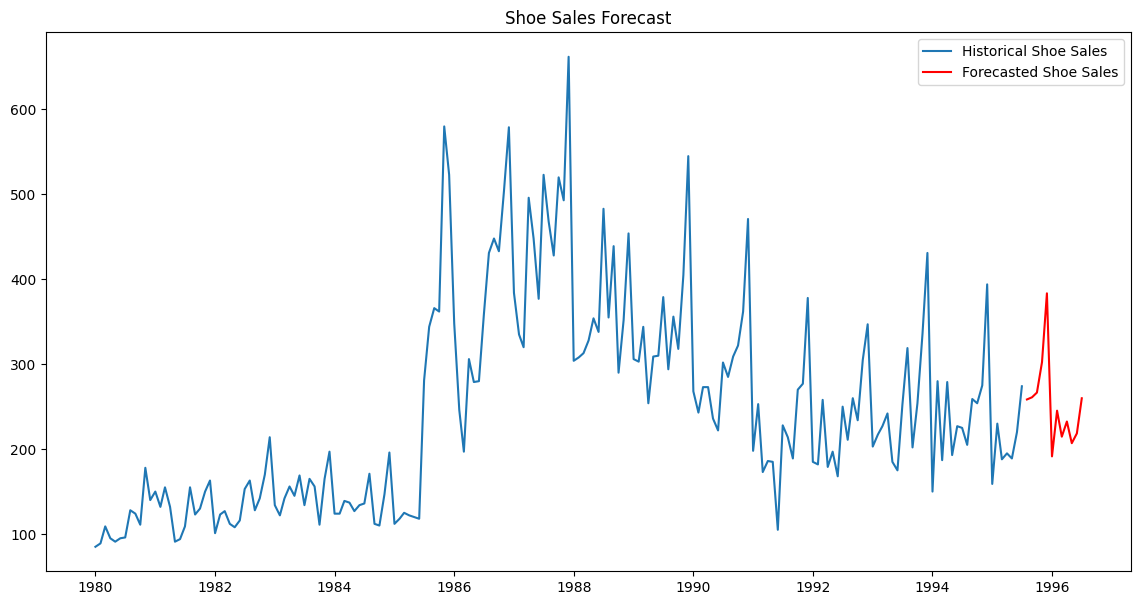

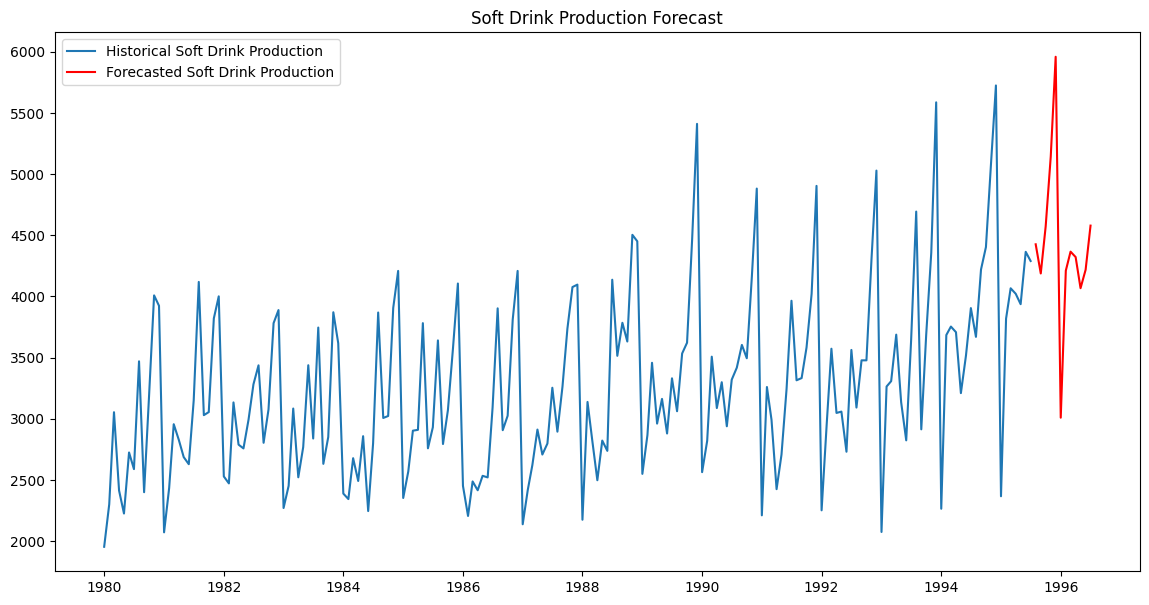

In [28]:
# Visualize the forecasts
plt.figure(figsize=(14, 7))
plt.plot(shoe_sales_data, label='Historical Shoe Sales')
plt.plot(shoe_sales_forecast.index, shoe_sales_forecast, label='Forecasted Shoe Sales', color='red')
plt.title('Shoe Sales Forecast')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(soft_drink_production_data, label='Historical Soft Drink Production')
plt.plot(soft_drink_forecast.index, soft_drink_forecast, label='Forecasted Soft Drink Production', color='red')
plt.title('Soft Drink Production Forecast')
plt.legend()
plt.show()